In [10]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors

In [11]:
#relevant paths
base_path = os.getcwd().split('scripts')[0]
array_path_base = base_path + 'fig_arrays/'
fig_path_base = base_path+'figs/'

In [12]:
#rc settings
rcParams.update({'figure.autolayout': True})
plt.rc('font', family='serif')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rc('axes',edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['text.usetex'] = True

/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  """


In [13]:
def latex_float(f, n):
    kwrd = '{0:.' +str(n)+ 'g}'
    float_str = kwrd.format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

In [28]:
rl0 = 'none'
rl1 = 'left'
rl2 = 'right'
fig_path = fig_path_base + 'figmaker_plots/'
fig_arrays_path00 = array_path_base + 'stats_' + rl0 + '_' + rl0 + '/'
fig_arrays_path01 = array_path_base + 'stats_' + rl0 + '_' + rl1 + '/'
fig_arrays_path02 = array_path_base + 'stats_' + rl0 + '_' + rl2 + '/'
fig_arrays_path11 = array_path_base + 'stats_' + rl1 + '_' + rl1 + '/'
sph_ave = 'weighted_dl'
astro_model = 'Andromeda4'

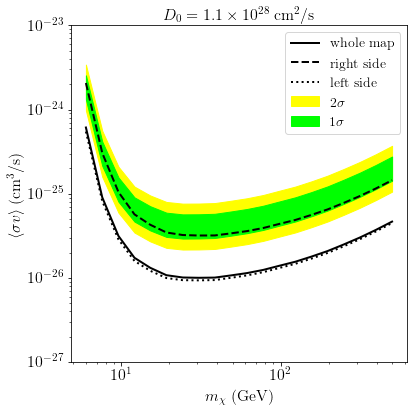

<Figure size 720x432 with 0 Axes>

In [26]:
abs_z = np.array([2,1])
inds = np.array([[0, 4], [1, 3]])
col = ['yellow', 'lime']
mx_set_out = np.load(fig_arrays_path01 + 'mx_set.npy')
D0_set_out = np.load(fig_arrays_path01 + 'D0_set.npy')
D0_ind = 1
num_mx = len(np.unique(mx_set_out))
num_D0 = len(np.unique(D0_set_out))
mx_st_ls = [i*num_mx for i in range(num_D0)]
mx_st = mx_st_ls[D0_ind]
sigmav_lim_real00 = np.load(fig_arrays_path00 + 'real_lims_mask'  + rl0 + '_' + rl0 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lims00 = np.load(fig_arrays_path00 + 'expected_lims_mask' + rl0 + '_' + rl0 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lim_real01 = np.load(fig_arrays_path01 + 'real_lims_mask'  + rl0 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lims01 = np.load(fig_arrays_path01 + 'expected_lims_mask' + rl0 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lim_real02 = np.load(fig_arrays_path02 + 'real_lims_mask'  + rl0 + '_' + rl2 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lims02 = np.load(fig_arrays_path02 + 'expected_lims_mask' + rl0 + '_' + rl2 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
for sigmavlimr_mask00, sigmavlimr_mask01, sigmavlimr_mask02, sigmavlim_mask00 in zip(sigmav_lim_real00, sigmav_lim_real01, sigmav_lim_real02, sigmav_lims00):
    fig=plt.figure()
    for z, ind, c in zip(abs_z, inds, col):
        plt.fill_between(mx_set_out[mx_st:mx_st+num_mx], sigmavlim_mask00[mx_st:mx_st+num_mx, ind[0]], sigmavlim_mask00[mx_st:mx_st+num_mx,ind[1]], label=r'$' + str(z) + r'\sigma$', color=c)
    plt.plot(mx_set_out[mx_st:mx_st+num_mx], sigmavlimr_mask00[mx_st:mx_st+num_mx], label='whole map', color='k')
    plt.plot(mx_set_out[mx_st:mx_st+num_mx], sigmavlimr_mask01[mx_st:mx_st+num_mx], label='right side', color='k', linestyle='--')
    plt.plot(mx_set_out[mx_st:mx_st+num_mx], sigmavlimr_mask02[mx_st:mx_st+num_mx], label='left side', color='k', linestyle='dotted')
    ax = plt.gca()
    ax.set_ylim([10**(-27), 10**(-23)])
    plt.title(r'$D_0 = '+ latex_float(D0_set_out[mx_st], 2) + r' \; \mathrm{cm^2/s}$', size=16)
    plt.ylabel(r'$\langle \sigma v\rangle \;\rm{(cm^3/s)}$', size=16)
    plt.xlabel(r'$m_\chi \;\rm{(GeV)}$', size=16)
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.set_box_aspect(1)
    fig.tight_layout()
    plt.legend()
    plt.savefig(fig_path + 'brazilplot_' + astro_model + 'sphave_' + sph_ave + '_' + rl0 + '_' + rl1 + '_' + rl2 + '_D0_' + str(D0_set_out[mx_st]) + '.pdf', format='pdf',bbox_inches='tight')
    #plt.imshow(ma.array(data, mask=np.logical_not(this_mask)), vmin=np.min(data), vmax=np.max(data))
    #plt.colorbar(orientation='horizontal')
    #plt.savefig(fig_path01+ '/search_region_' + rl_mask0 + '_' + rl_mask1 + '.pdf')
    #plt.savefig(fig_path + 'default_limit_plot.pdf', format='pdf')
    

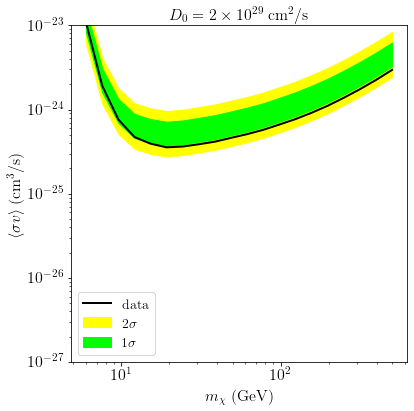

In [37]:
abs_z = np.array([2,1])
inds = np.array([[0, 4], [1, 3]])
col = ['yellow', 'lime']
mx_set_out = np.load(fig_arrays_path01 + 'mx_set.npy')
D0_set_out = np.load(fig_arrays_path01 + 'D0_set.npy')
D0_ind = 3
num_mx = len(np.unique(mx_set_out))
num_D0 = len(np.unique(D0_set_out))
mx_st_ls = [i*num_mx for i in range(num_D0)]
mx_st = mx_st_ls[D0_ind]
sigmav_lim_real11 = np.load(fig_arrays_path11 + 'real_lims_mask'  + rl1 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lims11 = np.load(fig_arrays_path11 + 'expected_lims_mask' + rl1 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
for sigmavlimr_mask11, sigmavlim_mask11 in zip(sigmav_lim_real11, sigmav_lims11):
    fig=plt.figure()
    for z, ind, c in zip(abs_z, inds, col):
        plt.fill_between(mx_set_out[mx_st:mx_st+num_mx], sigmavlim_mask11[mx_st:mx_st+num_mx, ind[0]], sigmavlim_mask11[mx_st:mx_st+num_mx,ind[1]], label=r'$' + str(z) + r'\sigma$', color=c)
    plt.plot(mx_set_out[mx_st:mx_st+num_mx], sigmavlimr_mask11[mx_st:mx_st+num_mx], label='data', color='k')
    plt.title(r'$D_0 = '+ latex_float(D0_set_out[mx_st], 2) + r' \; \mathrm{cm^2/s}$', size=16)
    plt.ylabel(r'$\langle \sigma v\rangle \;\rm{(cm^3/s)}$', size=16)
    plt.xlabel(r'$m_\chi \;\rm{(GeV)}$', size=16)
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.set_box_aspect(1)
    ax.set_ylim([10**(-27), 10**(-23)])
    fig.tight_layout()
    plt.legend()
    plt.savefig(fig_path + 'brazilplot_' + astro_model + 'sphave_' + sph_ave + '_' + rl1 + '_D0_' + str(D0_set_out[mx_st]) + '.pdf', format='pdf',bbox_inches='tight')

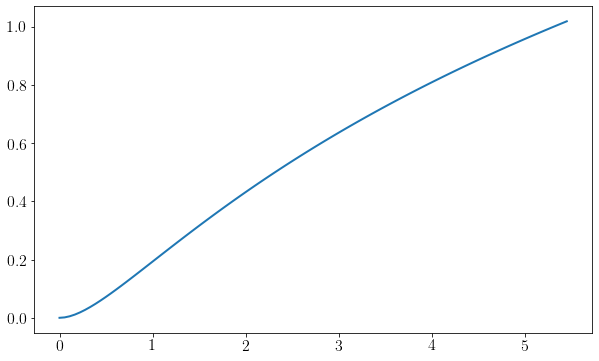

In [43]:
from scipy.special import hyp2f1

g = np.array([.5, .75, 1 , 1.25, 1.4])
r = np.linspace(0, 90, 100)
r0 = np.linspace(5, 40, 100)
r0_default = 16.5
default = (r/r0_default)**(3-g[2])*hyp2f1(3 - g[2], 3 - g[2], 4 - g[2], -r/r0_default)/(3-g[2])
plt.plot(r/r0_default, default)

(1, 4, 20)
(1, 4, 20)


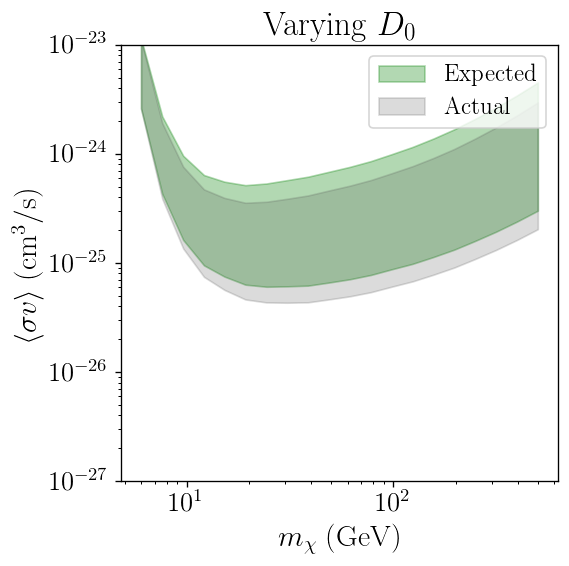

In [45]:
#results figs using 20000 simulated maps for each s+b and b
ind = 2 #median expected limit
mx_set_out = np.load(fig_arrays_path01 + 'mx_set.npy')
D0_set_out = np.load(fig_arrays_path01 + 'D0_set.npy')
sigmav_lim_real11 = np.load(fig_arrays_path11 + 'real_lims_mask'  + rl1 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
sigmav_lims11 = np.load(fig_arrays_path11 + 'expected_lims_mask' + rl1 + '_' + rl1 + 'sphave_' + sph_ave + '_' + astro_model + '.npy')
num_D0 = len(np.unique(D0_set_out))
num_mx = len(np.unique(mx_set_out))
D0_set = np.array([3e27, 3e28, 3e29])
expected_lims = np.array([[lim_mask[i*num_mx:(i+1)*num_mx, ind] for i in range(0, num_D0)] for lim_mask in sigmav_lims11])
real_lims = np.array([[lim_mask[i*num_mx:(i+1)*num_mx] for i in range(0, num_D0)] for lim_mask in sigmav_lim_real11])
print(expected_lims.shape)
print(real_lims.shape)
min_expected = np.min(expected_lims, axis=1)
max_expected = np.max(expected_lims, axis=1)
min_real = np.min(real_lims, axis=1)
max_real = np.max(real_lims, axis=1)

fig = plt.figure(figsize=(5, 5), dpi= 120)
ax = fig.add_subplot(111)
ax.fill_between(mx_set_out[:num_mx], min_expected[0], max_expected[0], color='g', label=r'Expected', alpha=.3)
ax.fill_between(mx_set_out[:num_mx], min_real[0], max_real[0], color='.3', label=r'Actual', alpha=.2)
ax.legend()
ax.set_xlabel(r'$m_\chi \; \rm{(GeV)}$', size=18)
ax.set_ylabel(r'$\langle \sigma v \rangle \; \rm{(cm^3/s)}$', size =18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Varying $D_0$', size=20)
ax.set_ylim([1e-27, 1e-23])
ax.set_box_aspect(1)
fig.tight_layout()
plt.savefig(fig_path + 'lims_varying_D0.pdf', format='pdf')

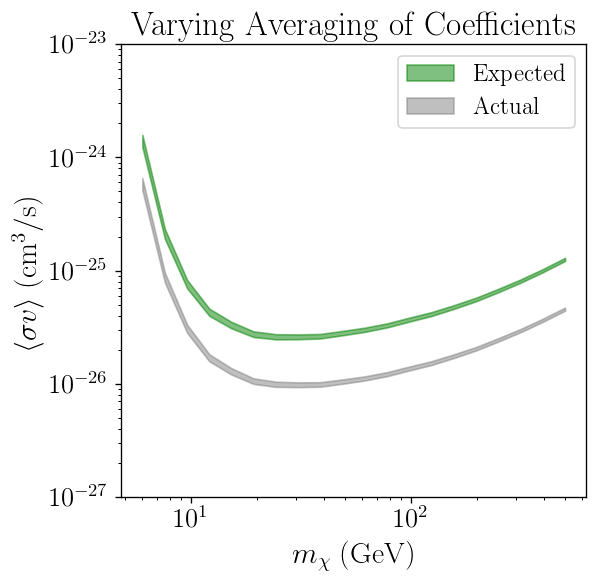

In [52]:
#results figs using 20000 simulated maps for each s+b and b
results_path = fig_array_path + 'results/'
ind = 3
mx_set_out = np.load(results_path + 'mx_set_default_weighted.npy')
D0_set_out = np.load(results_path + 'D0_set_default_weighted.npy')
mask_thicknesses = np.load(results_path + 'mask_thicknesses_a_default_weighted.npy')
sigmav_lim_real = np.load(results_path + 'real_lims_default_weighted.npy')
sigmav_lims = np.load(results_path + 'expected_lims_default_weighted.npy')
mx_set_out2 = np.load(results_path + 'mx_set_default_unweighted.npy')
D0_set_out2 = np.load(results_path + 'D0_set_default_unweighted.npy')
mask_thicknesses2 = np.load(results_path + 'mask_thicknesses_a_default_unweighted.npy')
sigmav_lim_real2 = np.load(results_path + 'real_lims_default_unweighted.npy')
sigmav_lims2 = np.load(results_path + 'expected_lims_default_unweighted.npy')
num_D0 = len(np.unique(D0_set_out))
num_mx = len(np.unique(mx_set_out))
D0_set = np.array([3e27, 3e28, 3e29])

fig = plt.figure(figsize=(5, 5), dpi= 120)
ax = fig.add_subplot(111)
ax.fill_between(mx_set_out[:num_mx], sigmav_lims[0, 20:40, ind], sigmav_lims2[0, 20:40, ind], color='g', label=r'Expected', alpha=.5)
ax.fill_between(mx_set_out[:num_mx], sigmav_lim_real[0, 20:40], sigmav_lim_real2[0, 20:40], color='.5', label=r'Actual', alpha=.5)
ax.legend()
ax.set_xlabel(r'$m_\chi \; \rm{(GeV)}$', size=18)
ax.set_ylabel(r'$\langle \sigma v \rangle \; \rm{(cm^3/s)}$', size =18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Varying Averaging of Coefficients', size=20)
ax.set_ylim([1e-27, 1e-23])
plt.savefig(fig_path + 'lims_varying_averaging_scheme.pdf', format='pdf')